In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv('titanic/train.csv', index_col = 'PassengerId')
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('titanic/test.csv', index_col = 'PassengerId')
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1. EDA(Exploratory Data Analysis)

In [4]:
#matplotlib을 주피터 화면 내에 띄우도록 해주는 주피터 명령어
%matplotlib inline
import pandas as pd
#matplotlib을 이용해 그래프를 그릴 수 있는 pyplot (인터페이스 역할)과, 설정을 바꾸는데 사용되는 matplotlib 둘 다 import.
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100

In [5]:
# retina 옵션을 통해 해상도를 올린다.
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')
#또는  %config InlineBackend.figure_format = 'retina' 사용 가능

In [6]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


데이터를 살펴 보았을 때,  
- 생존확률은 약 38%  
- 탑승자의 평균 나이는 29세  
- 탑승 평균 비용은 32 파운드  

라는 것을 알 수 있다.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


그리고 결측값이 있는 데이터를 살펴보았을 때, train data 전체 891개의 엔트리 중에서 Age, Cabin, Embarked의 경우는 결측값이 있다는 것을 알 수 있다.  
또한, test data는 Age, Fare, Cabin에 결측값이 있다.  
이는 추후에 특정 값들로 채워주거나 아예 열을 없애버려야 할 것이다.

그럼 여러 값들에 대해 차트를 만들어 생존 확률에 어느 정도의 영향을 미쳤는지 파악해보자

In [10]:
# barchart를 생성하는 함수를 만든다.
def barChart(val, axes):
    df = pd.pivot_table(train ,index='Survived', values= 'Name', columns = val, aggfunc=len)
    df
    df.T.plot.bar(stacked=True, ax=axes)

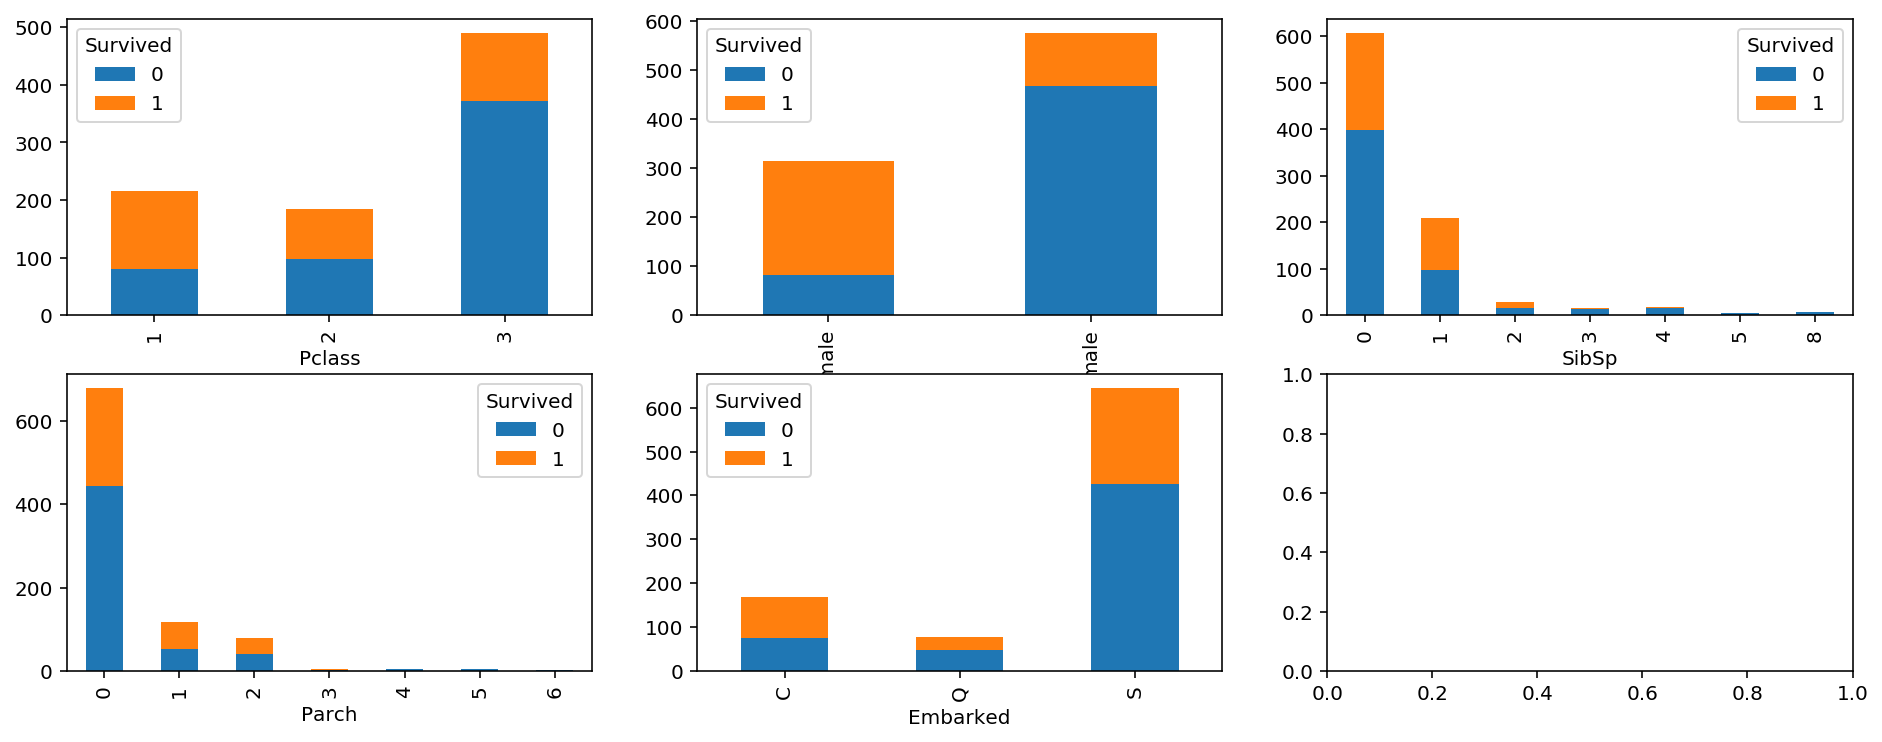

In [11]:
fig, axes = plt.subplots(2,3)
fig.set_size_inches(16,6)
barChart('Pclass', axes[0,0])
barChart('Sex', axes[0,1])
barChart('SibSp', axes[0,2])
barChart('Parch', axes[1,0])
barChart('Embarked', axes[1,1])

각 변수들을 봤을 때, 
1. Pclass가 높을수록 생존 확률이 높았다.  
2. 여성일수록 생존 확률이 높았다.    
3. 함께 탑승한 형제나 배우자 수에 따른 생존 확률은 정확히 파악 불가 --> 추후에 비율을 다시한번 볼 필요가 있음. 
4. 함께 탑승한 부모님 또는 자녀들 수에 따른 생존 확률은 정확히 파악 불가 --> 추후에 비율을 다시한번 볼 필요가 있음.  
5. 항구의 경우, Cherbourg, Queenstown, Southhampton 순으로 생존 확률이 높았다.

In [12]:
def kdeChart(val, sex):
    plt.figure(figsize=[16,4])
    sns.kdeplot(train.loc[(train['Survived']==0)&(train['Sex']==sex), val])
    sns.kdeplot(train.loc[(train['Survived']==1)&(train['Sex']==sex), val])
    plt.legend(['dead', 'survive'])
    plt.title('Survival by %s in %s' % (val, sex))

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


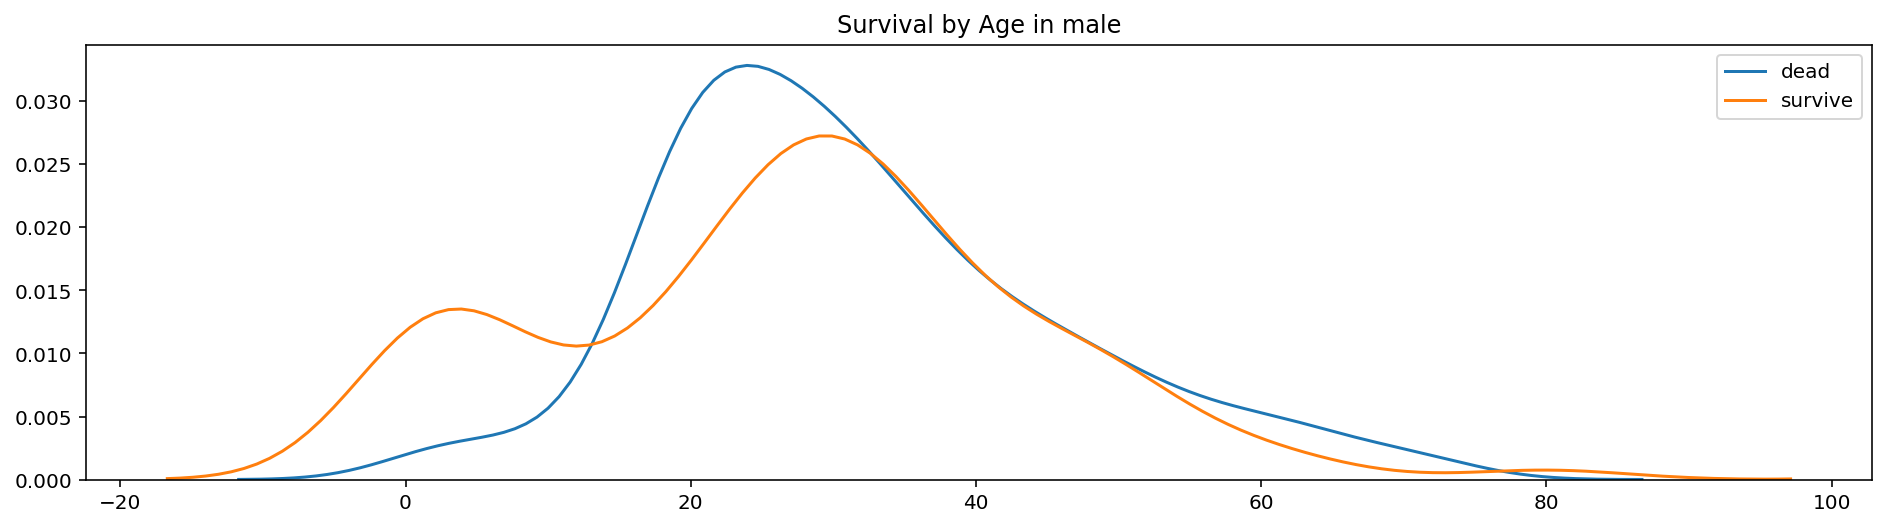

In [13]:
kdeChart('Age', 'male')

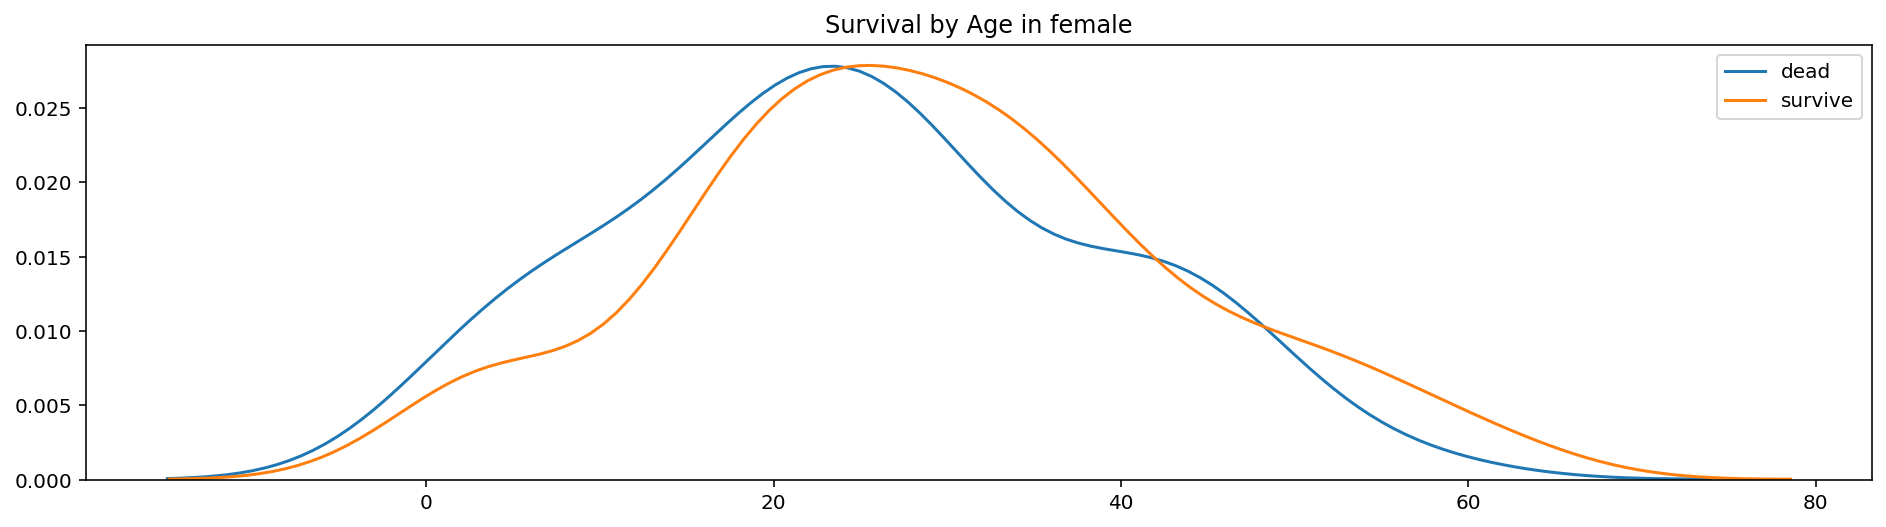

In [14]:
kdeChart('Age', 'female')

나이와 생존자의 연관성을 확인해보았을 때  
남성의 경우,
- 0~17세까지는 생존자가 많았으며  
- 나머지 나이대에서는 대부분 사망하였다.  

여성의 경우,
- 22~42세, 47세 이상에서 생존율이 높았다.

--> 위 정보는 추후에 유용하게 활용될 수 있을 것 같다.

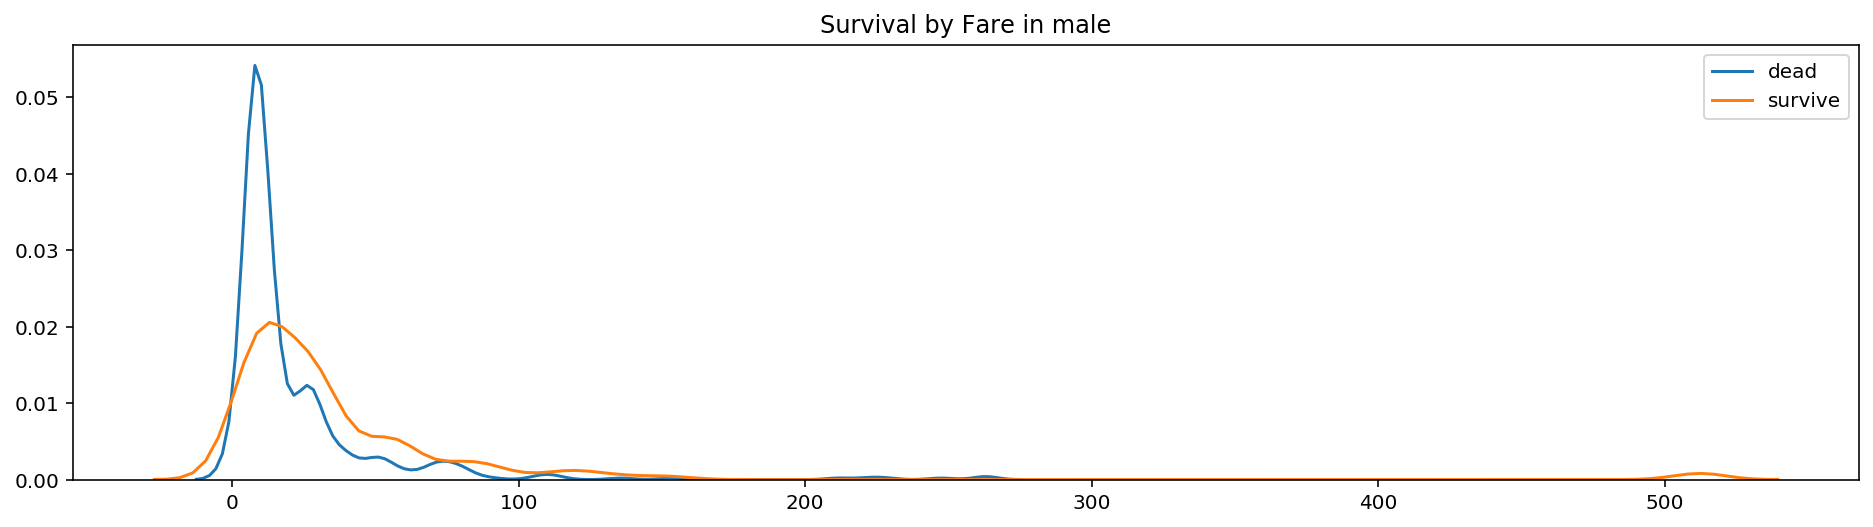

In [15]:
kdeChart('Fare', 'male')

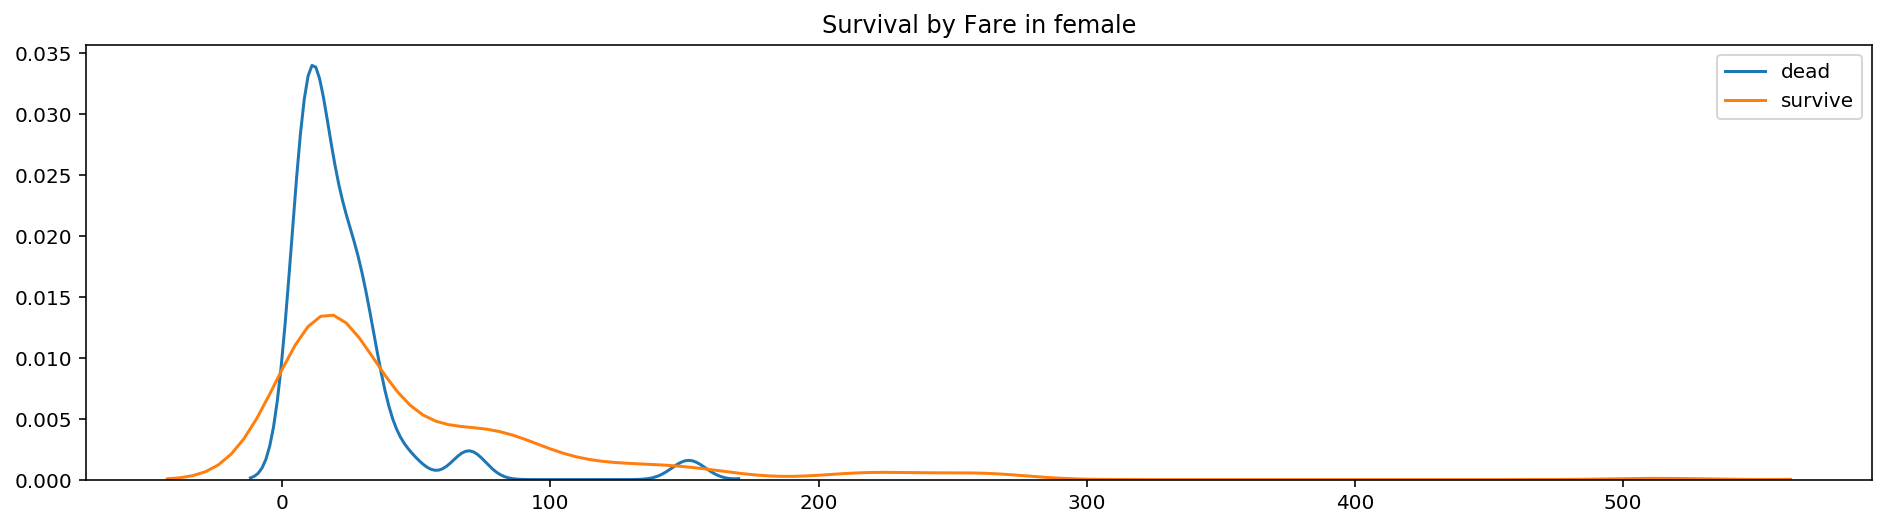

In [16]:
kdeChart('Fare', 'female')

또한, Fare의 경우를 살펴보았을 때에도 의미 있는 결과가 나올 수 있을 것 같다.  
위 그래프를 보면 요금은 성별에 관계없이 낮았을 때, 생존 확률이 크게 떨어졌다.

In [17]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2. 결측값 없애기
위에서 확인한 바로 Age와 Cabin, Embarked, Fare에 결측값이 존재했다. 그런데 Cabin의 경우는 결측값이 너무 많고, 추후 활용방안에 대해 떠오르는 것이 없기 때문에  
우선 Cabin은 제외하고 진행하겠다.

먼저 Age의 결측값을 채우기 위해 사람들의 이름을 볼 것이다. Age의 경우 값의 범위가 넓고 결측값이 적지 않기 때문에 단순히 평균값을 넣는 것은 좋지 않은 방법이다.  
서양 문화에서는 그 사람의 특징을 특정 호칭을 통해 부르는 경우가 있다.  
한국의 아저씨, 아주머니와 같이 나이대를 추측해볼 수 있는 호칭말이다.  
따라서 탑승객의 이름에서 호칭을 분리해 그 호칭별 평균 나이를 결측값에 넣도록 하겠다.

In [18]:
train['Name'].value_counts()

Beavan, Mr. William Thomas                         1
Palsson, Miss. Stina Viola                         1
Mack, Mrs. (Mary)                                  1
Vovk, Mr. Janko                                    1
Nasser, Mrs. Nicholas (Adele Achem)                1
                                                  ..
Skoog, Mrs. William (Anna Bernhardina Karlsson)    1
Devaney, Miss. Margaret Delia                      1
Van Impe, Miss. Catharina                          1
Hocking, Mrs. Elizabeth (Eliza Needs)              1
McCormack, Mr. Thomas Joseph                       1
Name: Name, Length: 891, dtype: int64

In [19]:
train['Name_title'] = train['Name'].str.extract('([A-Za-z]+)\.')
train['Name_title'].head()

PassengerId
1      Mr
2     Mrs
3    Miss
4     Mrs
5      Mr
Name: Name_title, dtype: object

In [20]:
train['Name_title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Sir           1
Lady          1
Ms            1
Don           1
Countess      1
Capt          1
Mme           1
Name: Name_title, dtype: int64

호칭들이 꽤 많이 존재하기 때문에 비슷한 의미를 가지고 있는 호칭들로 그룹화시킬 필요가 있다. <br> 
이 때, Dr나 Rev 같이 성별이 애매한 경우는 현재 데이터에 있는 사람들의 Sex 정보를 통해 성별을 구분한다.  
따라서 Dr의 경우는 한명을 제외한 모두가 male이기 때문에 Mr로 구분한다.
추가로 Master는 어린 남성 아이를 의미하므로 Mr와 구분하였다.

test data도 마찬가지로 확인해보고 딕셔너리 리스트에 매핑할 이름을 추가해준다.

In [21]:
test['Name_title'] = test['Name'].str.extract('([A-Za-z]+)\.')
test['Name_title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Name_title, dtype: int64

In [22]:
newtitles={
    "Capt":       "Mr",
    "Col":        "Mr",
    "Major":      "Mr",
    "Jonkheer":   "Mr",
    "Don":        "Mr",
    "Sir" :       "Mr",
    "Dr":         "Mr",
    "Rev":        "Mr",
    "Dona":       "Mrs",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Mrs",
    "Countess" : "Mrs"}

train['Name_title'] = train['Name_title'].map(newtitles)
test['Name_title'] = test['Name_title'].map(newtitles)

In [23]:
train['Name_title'].value_counts()

Mr        538
Miss      184
Mrs       129
Master     40
Name: Name_title, dtype: int64

In [24]:
test['Name_title'].value_counts()

Mr        245
Miss       78
Mrs        74
Master     21
Name: Name_title, dtype: int64

### 2-1. Fill Age

In [25]:
# train, test 각각 name title 별 평균 나이를 반올림한다.
train_fillAge = round(train.groupby('Name_title')['Age'].mean())
test_fillAge = round(test.groupby('Name_title')['Age'].mean())

# 딕셔너리 형태로 만들어주어 각 테이블 결측값에 매핑시킨다.
fillAge = [dict(train_fillAge), dict(test_fillAge)]

combine = [train, test]

for i in range(2):
    combine[i]['Age_clean'] = combine[i]['Age']    
    combine[i].loc[pd.isnull(combine[i]['Age_clean']), 'Age_clean'] = combine[i].loc[pd.isnull(combine[i]['Age_clean']) ,'Name_title'].map(fillAge[i])
       
print(pd.isnull(train['Age_clean']).sum())
pd.isnull(test['Age_clean']).sum()

0


0

이제 Age에 대한 결측값은 모두 채웠다. 그럼 이제 Embarked와 Fare에 대한 결측값을 채우자!

### 2-2. Fill Embarked

In [26]:
train[pd.isnull(train['Embarked'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Age_clean
PassengerId,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,38.0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,62.0


In [27]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked의 경우 결측값이 2개밖에 없다. 따라서 그냥 가장 많은 개수를 가지고 있는 S로 넣어주면 될 것 같다.  
참고로, 구글에 두명의 이름을 검색해보면 둘 다 Southampton에서 배에 탑승한 기록이 나온다.

In [28]:
train.loc[pd.isnull(train['Embarked']), 'Embarked'] = 'S'

Fare의 결측값은 단순히 전체의 평균값을 줄 수도 있겠지만, 티켓 요금이 사람의 나이대와 관련이 있기 때문에 추후 Age를 범주화한 뒤 Age의 결측값을 채웠던 것과 같은 방식으로 같은 Age 범주의 평균값을 채워주는 것이 더 좋을 것 같다.

In [29]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Name_title', 'Age_clean'],
      dtype='object')

### 2-3. Fill Fare

In [30]:
import numpy as np
bins = [0,5,12,18,24,35,60, np.inf]
age_group = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['Age_Group'] = pd.cut(train['Age_clean'], bins, labels = age_group)
test['Age_Group'] = pd.cut(test['Age_clean'], bins, labels = age_group)

Age를 그룹화 하였으니, 위에서 말한 것처럼 test 데이터의 fare 결측값을 나이 그룹에 따라 부여하도록 하겠다.

In [31]:
test.loc[pd.isnull(test['Fare'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Age_clean,Age_Group
PassengerId,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,60.5,Senior


In [32]:
test.loc[pd.isnull(test['Fare']), 'Fare'] = test.groupby('Age_Group')['Fare'].mean()['Senior']

In [33]:
test.loc[pd.isnull(test['Fare'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Age_clean,Age_Group
PassengerId,,,,,,,,,,,,,


추가적으로 위 그래프에서 보았을 때, Fare의 경우 비대칭성이 크기 때문에 추후 머신러닝 모델이 outlier에 대해 민감하게 반응할 가능성이 존재한다.  
따라서 Fare 전체에 log를 취해 비대칭성을 없애주도록 하겠다.

In [34]:
# train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
# test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

이제 나이와 항구, 요금의 결측값을 채워주었다. 그럼 기존의 데이터를 가지고 새로운 "의미있는" 데이터를 만들어보자!

## 3. Feature Engineering

#### 3-1. Family size

위에서 본 바로 Parch, Sibsp의 데이터를 통해 탑승객의 Family size를 유추할 수 있을 것 같다. 따라서 Family Size라는 데이터를 살펴보겠다.

In [35]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

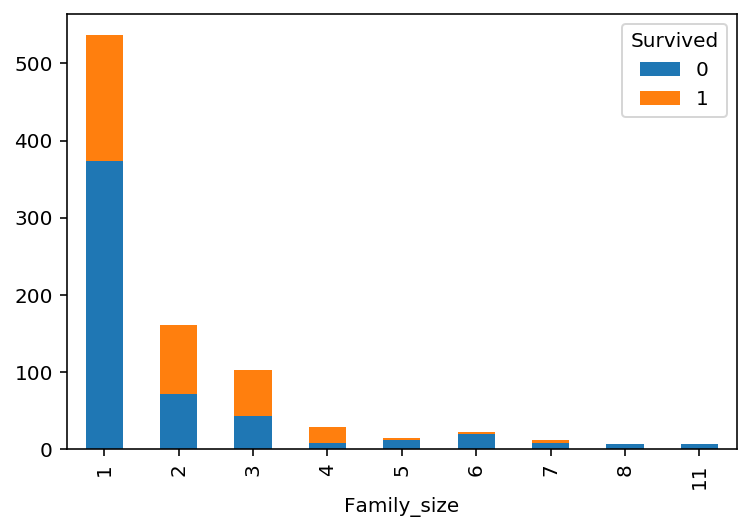

In [36]:
pd.pivot_table(train ,index='Survived', values= 'Name', columns = 'Family_size', aggfunc=len).T.plot.bar(stacked=True)

family size 컬럼을 따로 만들어 차트로 확인해보니, 혼자 탑승한 고객보다는 1~3명 정도의 가족과 함께 탑승한 사람들의 생존율이 높았다는 것을 알 수 있다.
따라서 family size를 위의 생존율과 연관지어 그룹화를 시킨다면 추후 머신러닝 모델이 더욱 쉽게 구분을 할 수 있을것이다.

In [37]:
train.loc[train['Family_size']==1, 'Family_size_group'] = 'Alone'
train.loc[(train['Family_size']>=2) & (train['Family_size']<5), 'Family_size_group'] = 'Small'
train.loc[train['Family_size']>=5, 'Family_size_group'] = 'Big'

In [38]:
test.loc[test['Family_size']==1, 'Family_size_group'] = 'Alone'
test.loc[(test['Family_size']>=2) & (test['Family_size']<5), 'Family_size_group'] = 'Small'
test.loc[test['Family_size']>=5, 'Family_size_group'] = 'Big'

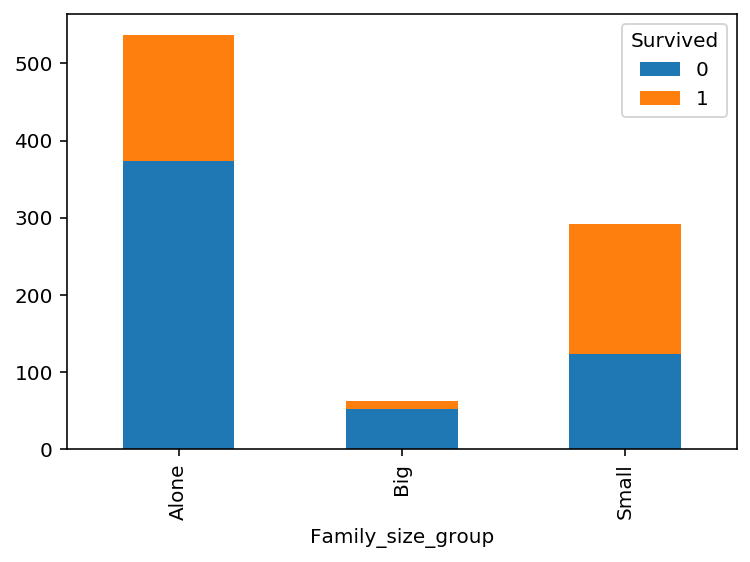

In [39]:
pd.pivot_table(train ,index='Survived', values= 'Name', columns = 'Family_size_group', aggfunc=len).T.plot.bar(stacked=True)

#### 3-2. Fare

In [40]:
# titanic = pd.concat([train, test])

# titanic['Fare'] = pd.qcut(titanic['Fare'], 13) 

# fig, ax = plt.subplots(figsize=(18, 6))
# sns.countplot(data=titanic, x='Fare', hue='Survived')

#### 3-3. Age

In [41]:
# titanic['Age_clean'] = pd.qcut(titanic['Age_clean'], 10)

# fig, ax = plt.subplots(figsize=(18, 6))
# sns.countplot(data=titanic, x='Age_clean', hue='Survived')

#### 3-4. Ticket Frequency

In [42]:
train['Ticket_Frequency'] = train.groupby('Ticket')['Ticket'].transform('count')
test['Ticket_Frequency'] = test.groupby('Ticket')['Ticket'].transform('count')

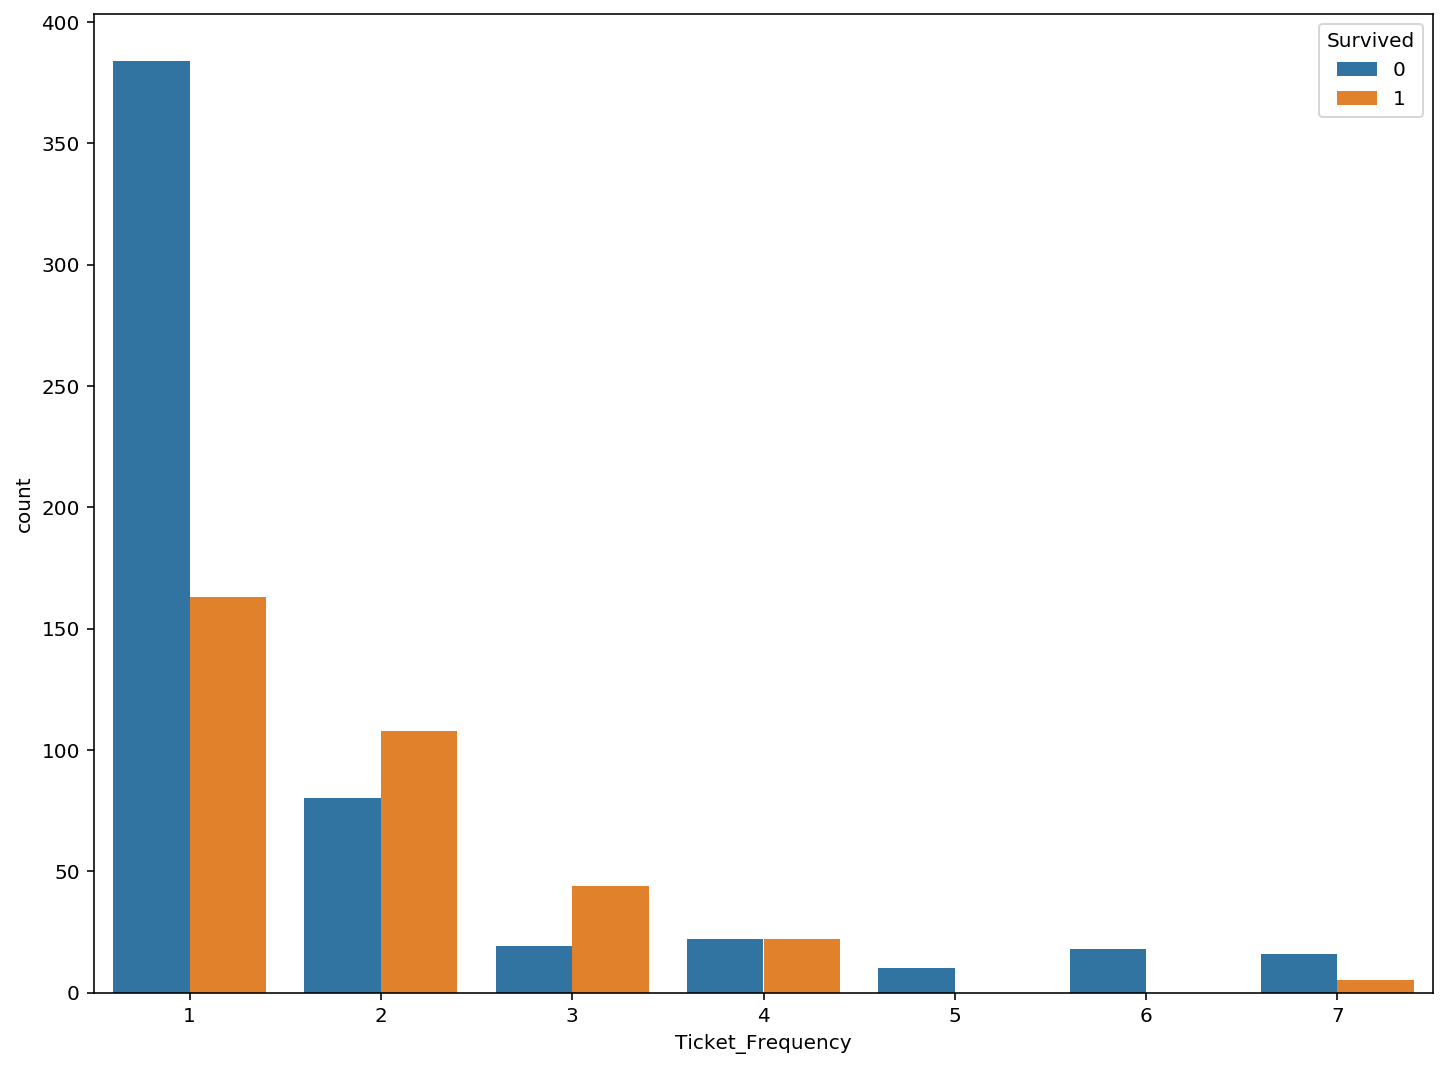

In [43]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=train)

같은 티켓을 소지하고 있는 승객들은 가족 또는 가족과 수행원들이 함께 이동하였다는 것을 의미한다.  
그리고 Ticket의 개수에 따른 생존율을 보게 되면, 2~3명 사이가 가장 생존률이 높았다.  
따라서 나는 Ticket Frequency를 2-3, others로 구분할 것이다.

In [44]:
train.loc[(train['Ticket_Frequency']==2)| (train['Ticket_Frequency']==3), 'Ticket_Frequency'] = 'Small_members'
test.loc[(test['Ticket_Frequency']==2)| (test['Ticket_Frequency']==3), 'Ticket_Frequency'] = 'Small_members'

In [45]:
train.loc[train['Ticket_Frequency']!='Small_members', 'Ticket_Frequency'] = 'others'
test.loc[test['Ticket_Frequency']!='Small_members', 'Ticket_Frequency'] = 'others'

#### 3-5. Is Married?

Mrs와 Miss의 경우 같은 여성이지만, 생존율에 차이가 존재한다.  
이 두 그룹을 나누는 가장 큰 특징은 결혼의 유무이기 때문에 is married라는 열을 추가해주겠다.

In [46]:
train['Married'] = 0
train.loc[train['Name_title']=='Mrs', 'Married'] = 1

test['Married'] = 0
test.loc[test['Name_title']=='Mrs', 'Married'] = 1

#### 3-6. Cabin

cabin의 경우, 제일 앞의 알파벳을 통해 선실의 위치를 가늠하게 해주는 deck을 추출할 수 있다.  
따라서 우선 각 cabin에서 deck을 추출하도록 하겠다.  
그리고 missing value에 대해서는 우선 'M'으로 정의한 뒤 여러 방식으로 살펴보겠다.

In [47]:
def extract_deck(c):
    if pd.isnull(c):
        return np.nan
    return c[0]

train['Deck'] = train['Cabin'].apply(extract_deck)
test['Deck'] = test['Cabin'].apply(extract_deck)

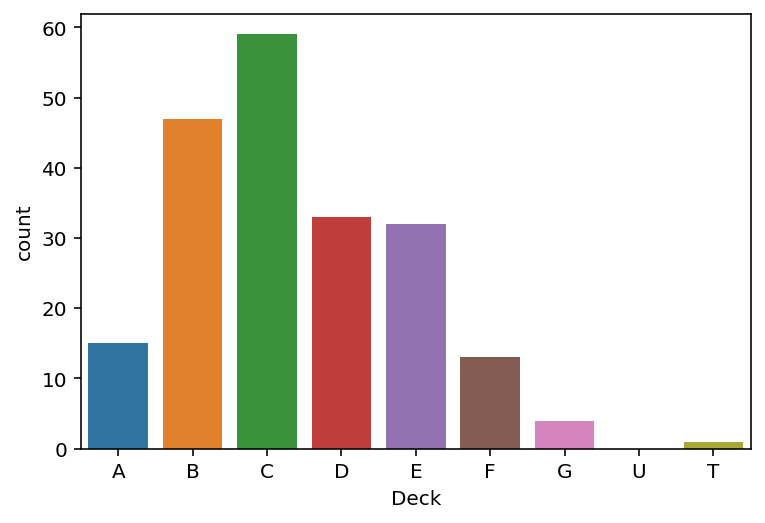

In [48]:
sns.countplot(data=train, x='Deck', order=['A','B','C','D','E','F','G','U','T'])

In [49]:
# 'M' means missing values
train.loc[train['Deck'].isnull(), 'Deck'] = 'M'
test.loc[test['Deck'].isnull(), 'Deck'] = 'M'

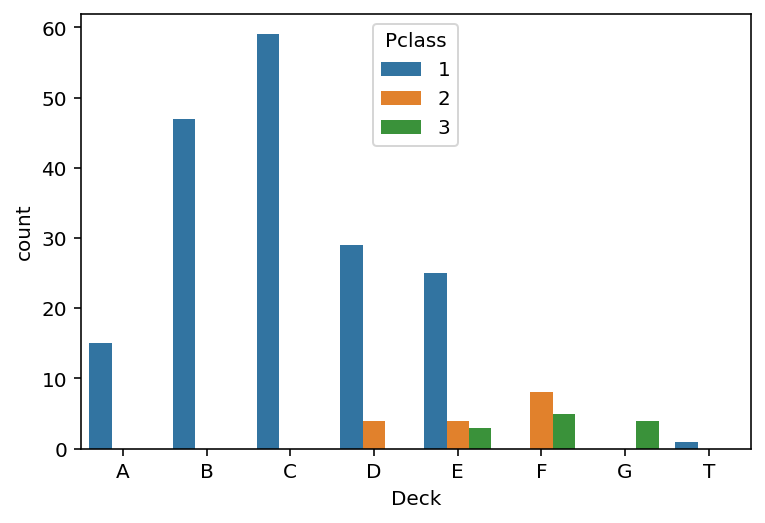

In [50]:
sns.countplot(data = train[train['Deck']!='M'], x='Deck', hue='Pclass', order=['A','B','C','D','E','F','G','T'])

Deck 별 Pclass의 분포를 보면 ABCT가 1, DE가 123의 혼재, FG가 23인 것을 알 수 있다.

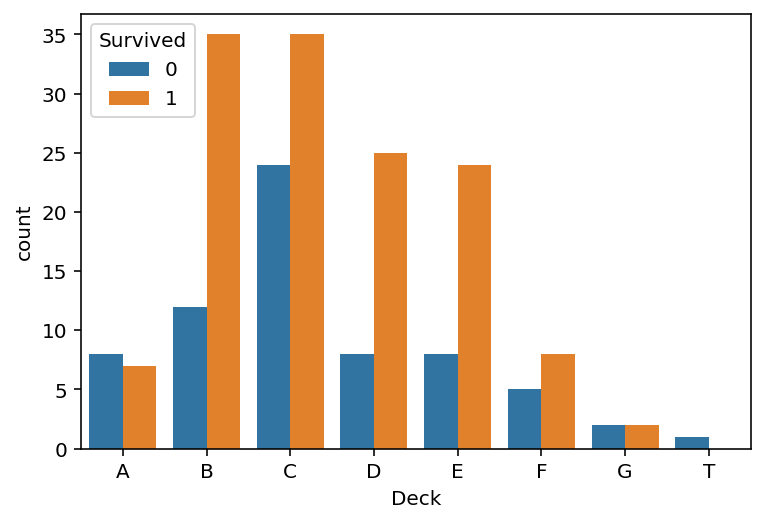

In [51]:
sns.countplot(data = train[train['Deck']!='M'], x='Deck', hue='Survived', order=['A','B','C','D','E','F','G','T'])

Deck 별 생존율을 살펴보았을 때, BCDE의 경우 생존율이 높았으며 AFGT는 생존율이 떨어졌다.  
배의 Deck 관련 이미지를 구글에 검색해보면  
https://www.google.com/url?sa=i&url=http%3A%2F%2Fm.blog.naver.com%2Fulsan-port%2F221217152641&psig=AOvVaw1lSditHO08ZVYhvrHVL8WY&ust=1578105370430000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCJCwjuKy5uYCFQAAAAAdAAAAABAJ  
위에서부터 아래로 A - G의 deck이 존재하는 것을 알 수 있다.  
예측하건데 배가 암초에 부딪혔을 때 상부층과 하부층이 강한 타격을 입어 승객들의 사망률이 높았을 것이다.

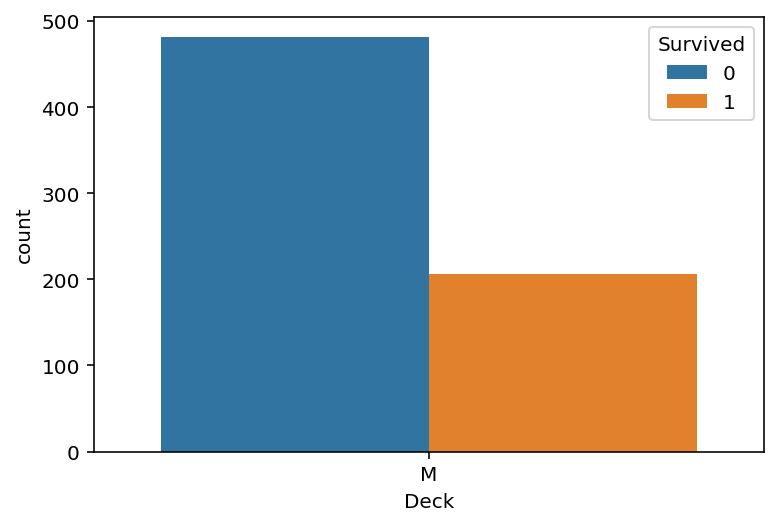

In [52]:
sns.countplot(data= train[train['Deck']=='M'], x='Deck', hue='Survived')

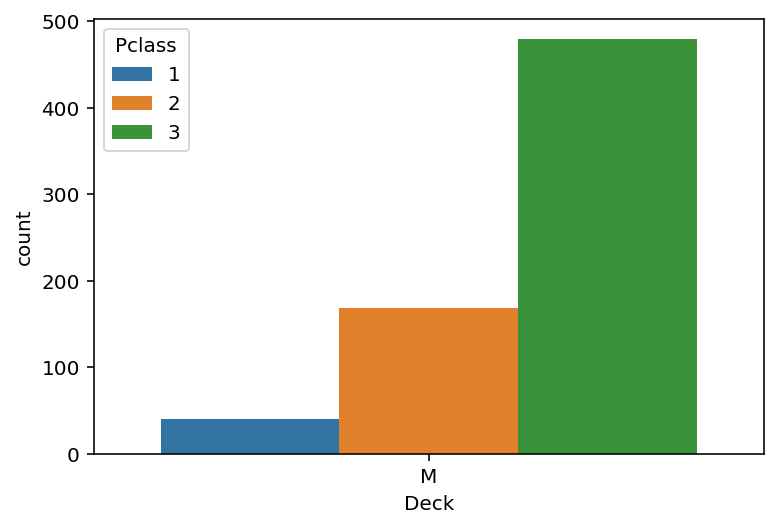

In [53]:
sns.countplot(data= train[train['Deck']=='M'], x='Deck', hue='Pclass')

그리고 M의 경우 사망률이 높았으며, pclass의 분포 또한 3등급 승객이 많았기 때문에 deck을 그룹화할 때, 사망률이 높았던 상,하부층과 함께 그룹화 하더라도 큰 문제가 없을 것이다.

결과적으로 Deck 그룹화는 생존율이 가장 높은 그룹인 BCDE와 생존율이 낮았지만 Pclass가 높았던 AT 그룹, 생존율과 Pclass가 모두 낮았던 FGM 그룹으로 나누도록 하겠다.

In [54]:
train['Deck'] = train['Deck'].replace(['B','C','D','E'], 'BCDE')
train['Deck'] = train['Deck'].replace(['A','T'], 'AT')
train['Deck'] = train['Deck'].replace(['F','G','M'], 'FGM')

test['Deck'] = test['Deck'].replace(['B','C','D','E'], 'BCDE')
test['Deck'] = test['Deck'].replace(['A','T'], 'AT')
test['Deck'] = test['Deck'].replace(['F','G','M'], 'FGM')

In [55]:
train['Deck'].unique()

array(['FGM', 'BCDE', 'AT'], dtype=object)

이제 모든 데이터가 머신러닝 모델에 넣을 수 있게 깔끔하게 정리 되었다. 이를 바탕으로 예측모형을 만들어보겠다.

## 4. Train
* feature_names : 학습과 예측에 사용할 컬럼을 리스트에 담습니다.
* X_train : feature_names 컬럼만 train 데이터셋에서 가져옵니다.
    * 학습, 훈련에 사용할 데이터셋
    * 예) 기출문제
* X_test : feature_names 컬럼만 test 데이터셋에서 가져옵니다.
    * 예측에 사용할 데이터셋
    * 예) 실전 시험문제
* y_train : 학습, 훈련에 사용할 정답값
    * 예) 기출문제의 정답
* model : 머신러닝 알고리즘
* model.fit(X_train, y_train) : 기출문제와 정답을 학습합니다.
* model.predict(X_test) : 실전시험
* Submit
    * sample submission 파일을 불러옵니다 => 답안지 양식을 불러오는 과정
    * 답안지에 정답을 옮겨 적습니다.
    * to_csv : 제출하기 위해 csv 파일로 저장합니다.
    * 캐글에 제출

#### 4-1. Encoding

##### 4-1-1. Non numerical Features

In [56]:
titanic = pd.concat([train, test])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [57]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

non_numeric_features = ['Age_clean', 'Fare']

for feature in non_numeric_features:        
    titanic[feature] = LabelEncoder().fit_transform(titanic[feature])

##### 4-1-2. Categorical Features

In [58]:
titanic.head()

,Age,Age_Group,Age_clean,Cabin,Deck,Embarked,Family_size,Family_size_group,Fare,Married,Name,Name_title,Parch,Pclass,Sex,SibSp,Survived,Ticket,Ticket_Frequency
PassengerId,,,,,,,,,,,,,,,,,,,
1,22.0,Student,32,NaN,FGM,S,2,Small,20,0,"Braund, Mr. Owen Harris",Mr,0,3,male,1,0.0,A/5 21171,others
2,38.0,Adult,57,C85,BCDE,C,2,Small,237,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,0,1,female,1,1.0,PC 17599,others
3,26.0,Young Adult,39,NaN,FGM,S,1,Alone,50,0,"Heikkinen, Miss. Laina",Miss,0,3,female,0,1.0,STON/O2. 3101282,others
4,35.0,Young Adult,53,C123,BCDE,S,2,Small,217,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,0,1,female,1,1.0,113803,Small_members
5,35.0,Young Adult,53,NaN,FGM,S,1,Alone,52,0,"Allen, Mr. William Henry",Mr,0,3,male,0,0.0,373450,others


In [59]:
titanic['Pclass'] = titanic['Pclass'].replace(1,'1st').replace(2,'2nd').replace(3,'3rd')

In [60]:
categorical = ['Pclass', 'Embarked', 'Family_size_group', 'Name_title', 'Deck', 'Sex', 'Ticket_Frequency']

In [61]:
titanic_cat = pd.get_dummies(titanic[categorical])
titanic_cat.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Embarked_C,Embarked_Q,Embarked_S,Family_size_group_Alone,Family_size_group_Big,Family_size_group_Small,Name_title_Master,Name_title_Miss,Name_title_Mr,Name_title_Mrs,Deck_AT,Deck_BCDE,Deck_FGM,Sex_female,Sex_male,Ticket_Frequency_Small_members,Ticket_Frequency_others
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1
3,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1
4,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0
5,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1


In [62]:
features = ['Age_clean', 'Fare', 'Survived', 'Married']

In [63]:
titanic_result = pd.concat([titanic[features], titanic_cat], axis=1)
titanic_result.head()

,Age_clean,Fare,Survived,Married,Pclass_1st,Pclass_2nd,Pclass_3rd,Embarked_C,Embarked_Q,Embarked_S,Family_size_group_Alone,Family_size_group_Big,Family_size_group_Small,Name_title_Master,Name_title_Miss,Name_title_Mr,Name_title_Mrs,Deck_AT,Deck_BCDE,Deck_FGM,Sex_female,Sex_male,Ticket_Frequency_Small_members,Ticket_Frequency_others
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,
1,32,20,0.0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,57,237,1.0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1
3,39,50,1.0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1
4,53,217,1.0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0
5,53,52,0.0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1


In [64]:
titanic_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 24 columns):
Age_clean                         1309 non-null int64
Fare                              1309 non-null int64
Survived                          891 non-null float64
Married                           1309 non-null int64
Pclass_1st                        1309 non-null uint8
Pclass_2nd                        1309 non-null uint8
Pclass_3rd                        1309 non-null uint8
Embarked_C                        1309 non-null uint8
Embarked_Q                        1309 non-null uint8
Embarked_S                        1309 non-null uint8
Family_size_group_Alone           1309 non-null uint8
Family_size_group_Big             1309 non-null uint8
Family_size_group_Small           1309 non-null uint8
Name_title_Master                 1309 non-null uint8
Name_title_Miss                   1309 non-null uint8
Name_title_Mr                     1309 non-null uint8
Name_title_Mrs              

#### 4-2. Model Sellecting

In [65]:
train = titanic_result[:len(train)]
test = titanic_result[len(train):]

In [66]:
train.Survived=train.Survived.astype('int')
train.Survived.dtype

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('int32')

In [67]:
xtrain=train.drop("Survived",axis=1)
ytrain=train['Survived']
xtest=test.drop("Survived", axis=1)

In [68]:
# Decision Tree, SVM, RandomForest, light gbm, xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# KFold, cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# GridSearchCV for finding optimal Hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [78]:
RF=RandomForestClassifier(random_state=37)
PRF=[{'n_estimators':[10,100],'max_depth':[3,10],'criterion':['gini','entropy']}]
GSRF=GridSearchCV(estimator=RF, param_grid=PRF, scoring='accuracy',cv=10)
scores_rf=cross_val_score(GSRF,xtrain,ytrain,scoring='accuracy',cv=10)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarn

In [79]:
np.mean(scores_rf)

0.8238034842810122

In [80]:
scores_rf

array([0.81111111, 0.83333333, 0.75280899, 0.87640449, 0.84269663,
       0.79775281, 0.82022472, 0.80898876, 0.86516854, 0.82954545])

In [773]:
svc = make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=10)
scores_svm=cross_val_score(GSSVM, xtrain.astype(float), ytrain,scoring='accuracy', cv=2)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [774]:
np.mean(scores_svm)

0.7924018743386909

In [82]:
model=GSRF.fit(xtrain, ytrain)
pred=model.predict(xtest)

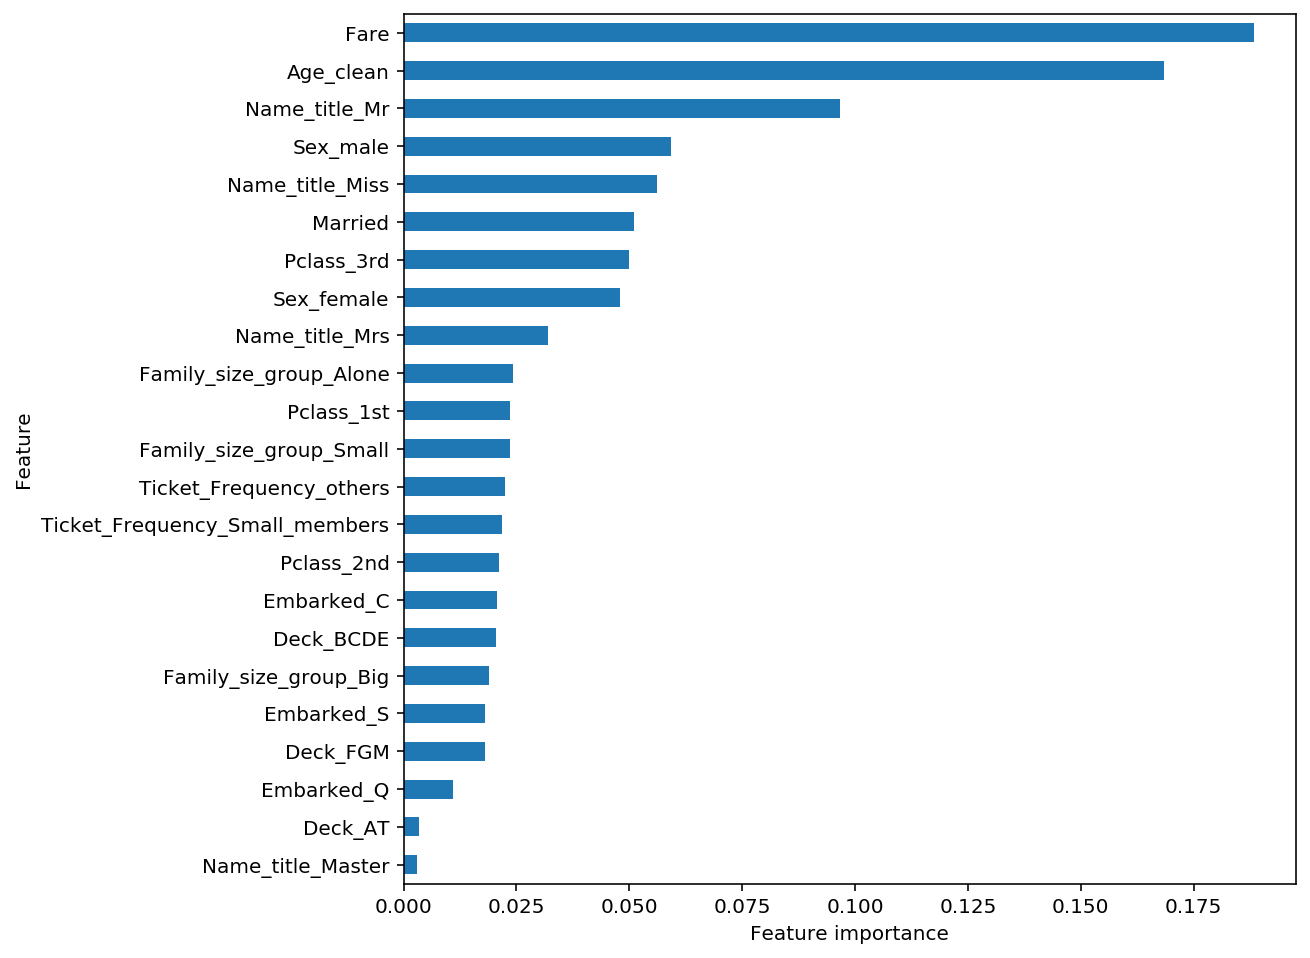

In [83]:
from pandas import Series

feature_importance = model.best_estimator_.feature_importances_
Series_feat_imp = Series(feature_importance, index=xtest.columns)
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## 5. Submit

In [84]:
# 답안지 형식을 불러옵니다.
submit = pd.read_csv("titanic/gender_submission.csv", 
            index_col="PassengerId")

In [85]:
# 예측한답을 답안지에 옮겨적습니다.
submit['Survived'] = pred
submit.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [86]:
# 캐글에 제출하기 위해 csv파일로 저장합니다.
submit.to_csv("titanic/kaggle_submit.csv")

In [87]:
# 제대로 저장이 되었는지 확인합니다.
pd.read_csv("titanic/kaggle_submit.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
